<a href="https://colab.research.google.com/github/manthanawgan/Iris-Flower-Classification/blob/patch-1/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [6]:
columns = ['Sepal length', 'Sepal Width', 'Petal length', 'Petal width', 'Class_label']
df = pd.read_csv('/content/IRIS.csv', names=columns)
df.head()

,Sepal length,Sepal Width,Petal length,Petal width,Class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.describe()

,Sepal length,Sepal Width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


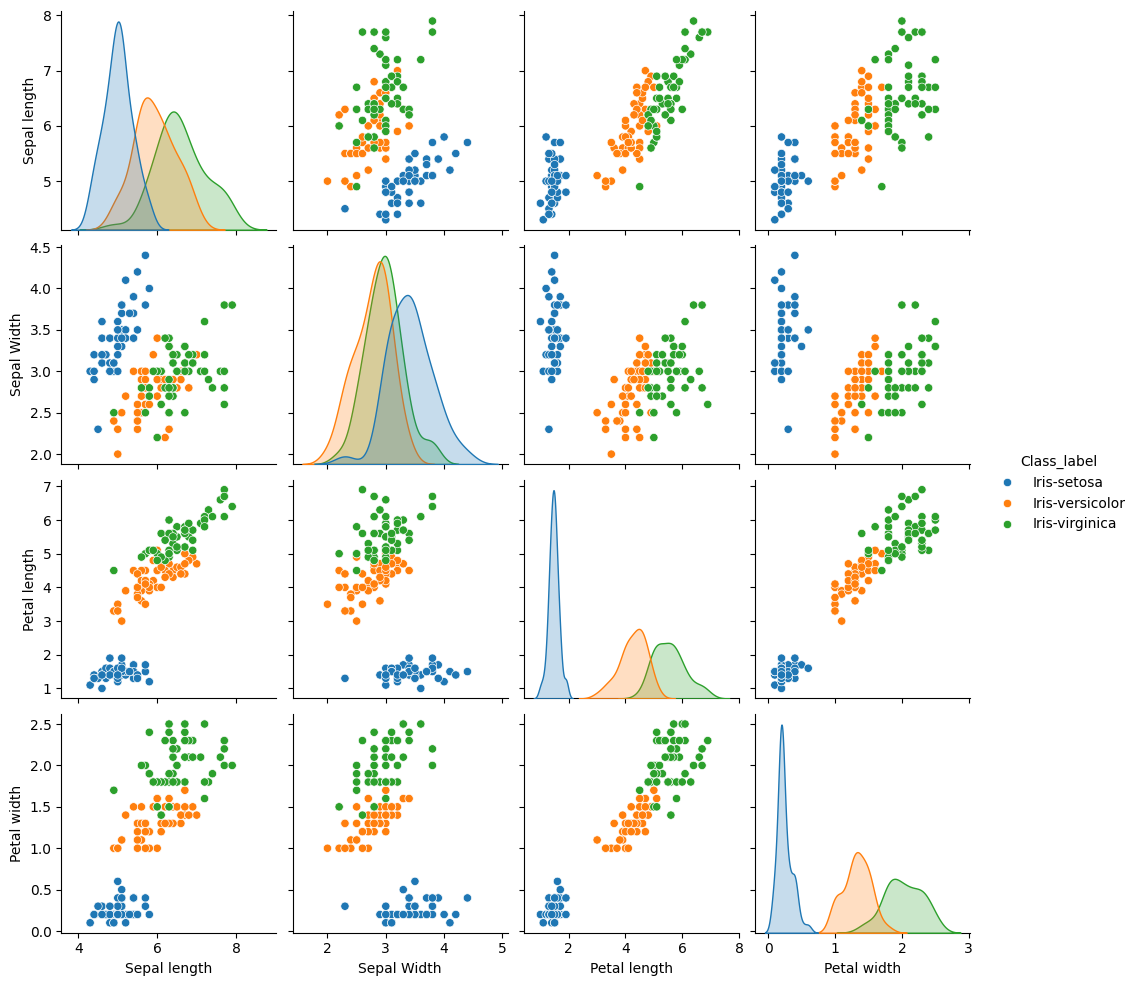

In [8]:
sns.pairplot(df, hue='Class_label')

In [9]:
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [11]:
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_Reshaped = Y_Data.reshape(4, 3)
Y_Data_Reshaped = np.swapaxes(Y_Data_Reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25


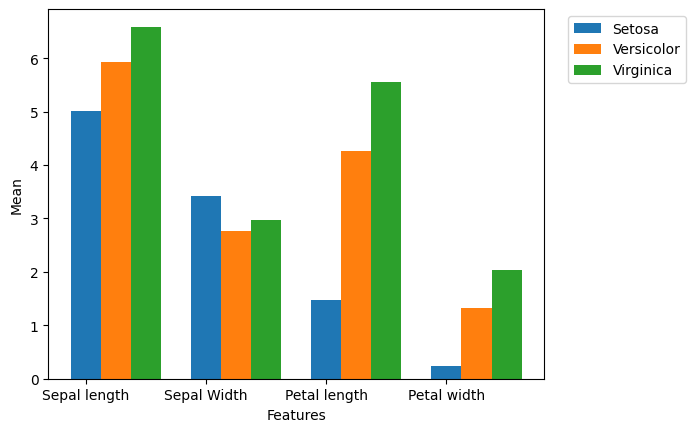

In [21]:
plt.bar(X_axis, Y_Data_Reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_Reshaped[1], width, label='Versicolor')
plt.bar(X_axis+width*2, Y_Data_Reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Mean")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [22]:
# Model training: spliting the data to train and test the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, Y_train)

SVC()

In [29]:
predictions = svn.predict(X_test)   #predict from the test dataset

from sklearn.metrics import accuracy_score    # calculate the accuracy
accuracy_score(Y_test, predictions)

0.9666666666666667

In [28]:
# the accuracy is above 96%

from sklearn.metrics import classification_report   #detailed classification report based on the test dataset
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.75      1.00      0.86         3
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.92      0.97      0.94        30
   weighted avg       0.97      0.97      0.97        30



In [32]:
X_new = np.array([[3, 2, 1, 0.2],[4.9, 2.2, 3.8, 1.1],[5.3, 2.5, 4.6, 1.9]])

prediction = svn.predict(X_new)
print("Predictions of species: {}".format(prediction))


Predictions of species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


In [33]:
# model is predicting correctly as setosa is largest and versicolor is shortest and veginica

import pickle                               # Save the model
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

with open('SVM.pickle', 'rb') as f:         # Load the model
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)